# Objectives-
*Build a machine learning model to identify fraudulent credit card transactions.

*Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets. 

*Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.

*Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results. 


# Import Libraries
We import all the required libraries for building,training,testing our model.Such as pandas,nump,seaborn,sklearn,matplotlib

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# Read Data

In [2]:
#Read the data
df = pd.read_csv("creditcard.csv")

# Explore Data

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.shape

(153758, 31)

In [5]:
df.isna().sum().sort_values()

Time      0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
Amount    0
V15       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
V14       0
Class     0
dtype: int64

No missing values :)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,...,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000,153758.000000
mean,55219.166333,-0.234187,0.045504,0.604016,0.134835,-0.236612,0.069428,-0.103249,0.051217,-0.029171,...,-0.036877,-0.109254,-0.028362,0.011553,0.115682,0.022757,0.001876,0.002859,88.537235,0.002146
std,22658.988461,1.836892,1.620692,1.327202,1.352793,1.326851,1.290105,1.195012,1.239475,1.131997,...,0.742079,0.647129,0.585021,0.595752,0.448905,0.490984,0.392118,0.311831,246.097358,0.046278
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.462573,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39394.000000,-1.021436,-0.539477,0.096945,-0.723555,-0.873953,-0.675633,-0.598162,-0.143827,-0.685397,...,-0.229086,-0.551681,-0.170680,-0.327445,-0.159352,-0.325815,-0.062807,-0.009576,5.860000,0.000000
50%,56784.000000,-0.258642,0.119851,0.704860,0.154723,-0.278833,-0.187899,-0.050370,0.072529,-0.116185,...,-0.059646,-0.085381,-0.041720,0.065159,0.154804,-0.056037,0.011011,0.022910,22.505000,0.000000
75%,73829.000000,1.164805,0.805848,1.337165,0.975383,0.295161,0.457292,0.435721,0.368644,0.571993,...,0.115133,0.321049,0.088913,0.411360,0.413009,0.286990,0.089884,0.078260,79.000000,0.000000
max,99999.000000,2.401777,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [7]:
#Define fraud and valid
f = df[df['Class'] == 1]
v = df[df['Class'] == 0]
#Print counts
print('There are {} fraudulent transactions'.format(f.shape[0]))
print('There are {} valid transcations'.format(v.shape[0]))

There are 330 fraudulent transactions
There are 153428 valid transcations


In [8]:
#Summary statistics for fraudulent transcaction
f.Amount.describe()

count     330.000000
mean      115.783606
std       233.695450
min         0.000000
25%         1.000000
50%        12.310000
75%       103.397500
max      1809.680000
Name: Amount, dtype: float64

In [9]:
#Summary statistics for valid transcations
v.Amount.describe()

count    153428.000000
mean         88.478632
std         246.120831
min           0.000000
25%           5.900000
50%          22.540000
75%          78.850000
max       19656.530000
Name: Amount, dtype: float64

Text(0, 0.5, 'Mean Transcation Amount')

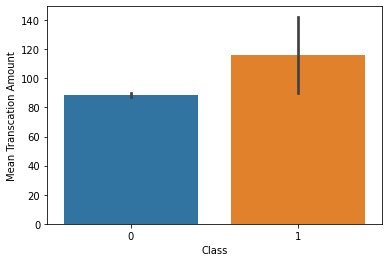

In [10]:
#Graph of amount
sns.barplot(data=df,x='Class', y='Amount')
plt.ylabel('Mean Transcation Amount')

In [11]:
n_replicas = 10

# inflate the original dataset
df = pd.DataFrame(np.repeat(df.values, n_replicas, axis=0), columns=df.columns)

print("There are " + str(len(df)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

# display first rows in the new dataset
print(df.head())

There are 1537580 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
3   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
4   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
2  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
3  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   


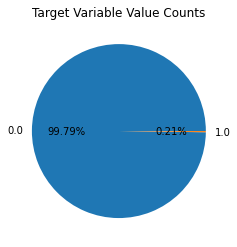

In [12]:
# get the set of distinct classes
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

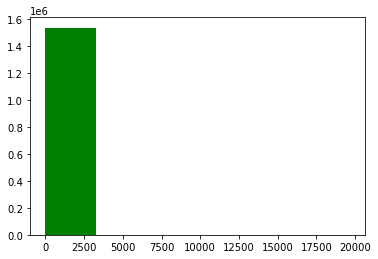

Minimum amount value is  0.0
Maximum amount value is  19656.53
90% of the transactions have an amount less or equal than  203.93


In [13]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

# Data Preprocessing

*We preprocessed the data and normalized using normalize() function

*We further split into training and testing sets

In [14]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (1537580, 29) y.shape= (1537580,)


# Split dataset to train/test

In [15]:
#splitting the dataset and train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1076306, 29) Y_train.shape= (1076306,)
X_test.shape= (461274, 29) Y_test.shape= (461274,)


<AxesSubplot:>

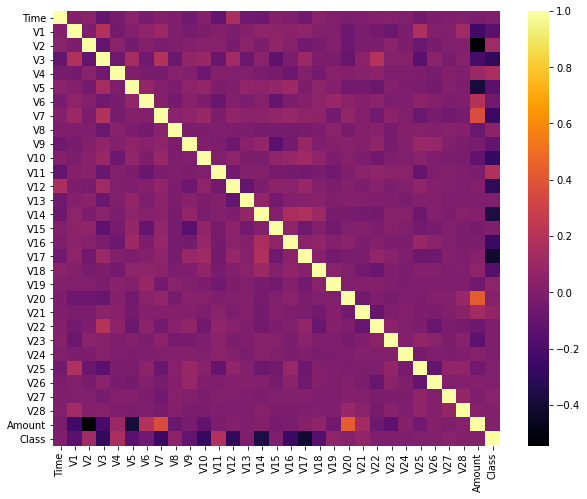

In [16]:
#Correlation Matrix
corr = df.corr()
fig = plt.figure(figsize = (10, 8)) 
sns.heatmap(corr, cmap='inferno')


# Model Building

# Evaluate our models
In this evaluation process, we evaluate the model's performance using metrics like precision, recall, and F1-score and consider techniques like oversampling or undersampling for improving results.

In [17]:
#Create Model Dictionary
models ={ 
         'LogReg': LogisticRegression(),  
         'rforest': RandomForestClassifier()
}
#Name and Score list
names=[]
scores=[]
#Loop over name and model 
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    names.append(name)
    scores.append(score)

In [18]:
#Create a DataFrame to Compare Scores
results = pd.DataFrame({'model': names, 'score': scores})
#Sort Results
results.sort_values(by='score', ascending=False)

,model,score
1,rforest,1.000000
0,LogReg,0.998994


#The random forest model performed best!

# Define the random forest model

In [19]:
#Define
rforest = RandomForestClassifier()
#Fit model
rforest.fit(X_train,y_train)
#predict
y_pred = rforest.predict(X_test)
#score
score = accuracy_score(y_pred, y_test)
#print
print(score)

1.0


In [20]:
#Create report
report=classification_report(y_test,y_pred)
#Print report
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    460284
         1.0       1.00      1.00      1.00       990

    accuracy                           1.00    461274
   macro avg       1.00      1.00      1.00    461274
weighted avg       1.00      1.00      1.00    461274



# Performing undersampling/oversampling 

Both undersampling and oversampling aim to improve the performance of machine learning models when dealing with imbalanced datasets.They are techniques used to address class imbalance in datasets, particularly in binary classification problems where one class is significantly more frequent than the other.

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

And now we have a Random Forest supervised classification model to predict credit card fraud.

In [23]:
# Apply Random Under-Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply Random Over-Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [24]:
# Train a Random Forest Classifier on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 1.0
Confusion Matrix:
[[460284      0]
 [     0    990]]
